<a href="https://colab.research.google.com/github/sathwika2005/ML_Project/blob/main/PCA_on_iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Total Variance of original features: 7.000000000000001
Total Variance after PCA: 6.865529782952498


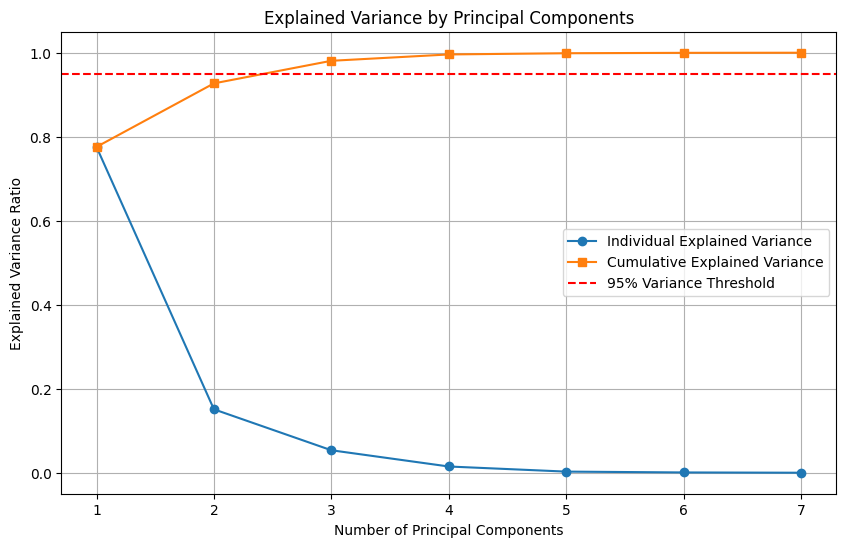

Initial Dimension: 7
New Dimension after PCA: 3
Reduced data (first 5 rows):
[[-2.44092806 -0.54206867  0.17854432]
 [-2.63406267  0.63751963 -0.14460478]
 [-3.66155648  0.03039696 -0.05111269]
 [-3.50744143  1.050518   -0.69123083]
 [-3.75459584 -0.76291355 -0.04882343]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/modified_large_iris_dataset.csv'
data = pd.read_csv(file_path)

# Separating the features and the target variables
features = data.iloc[:, :-3]  # Exclude species columns
target = data.iloc[:, -3:]    # Only species columns

# Step 1: Standardize the features (zero mean, unit variance)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Calculate the total variance of the original features before PCA
total_original_variance = np.sum(np.var(scaled_features, axis=0))

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(scaled_features.T)

# Step 3: Calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort the eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Step 5: Calculate the principal components
principal_components = scaled_features @ sorted_eigenvectors

# Calculate the cumulative variance explained by each component
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
cumulative_variance = np.cumsum(explained_variance_ratio)

# Find the number of components required to explain at least 95% of the variance
num_components = np.argmax(cumulative_variance >= 0.95) + 1

# Reduce the dimensionality by selecting the top 'num_components' principal components
reduced_data = principal_components[:, :num_components]

# Calculate the total variance of the reduced data (principal components)
total_pca_variance = np.sum(np.var(reduced_data, axis=0))

# Display the total variance before and after PCA
print(f"Total Variance of original features: {total_original_variance}")
print(f"Total Variance after PCA: {total_pca_variance}")

# Plotting the explained variance for each principal component
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', label='Individual Explained Variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='s', label='Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid()
plt.show()

# Display initial and new dimensions
initial_dimension = features.shape[1]
new_dimension = reduced_data.shape[1]
print(f"Initial Dimension: {initial_dimension}")
print(f"New Dimension after PCA: {new_dimension}")

# Display the first few rows of the reduced data
print("Reduced data (first 5 rows):")
print(reduced_data[:5])
